# Uso de las funciones estadísticas en Numpy, stats

In [1]:
from scipy import stats
from scipy import optimize

import numpy as np
import matplotlib.pyplot as plt

#para graficos estadisticos
import seaborn as sns
sns.set(style="whitegrid")

#### Solo con el paquete de numpy ya se pueden sacar varias funciones:

In [2]:
daticos = np.array([1,2,3,4,8])
print('promedio' , np.mean(daticos))
print('mediana' , np.median(daticos))
print('maximo' , np.max(daticos))
print('minimo' , np.min(daticos))
print('varianza' , np.var(daticos))               #poblacional
print('desviacion estandar' , np.std(daticos))    #poblacional
print('varianza' , np.var(daticos, ddof = 1   ))          #muestral el denominados en la expresion de la varianza es el numero de elementos menos ddof
print('desviacion estandar' , np.std(daticos, ddof = 1))  #muestral el denominados en la expresion de la varianza es el numero de elementos menos ddof

promedio 3.6
mediana 3.0
maximo 8
minimo 1
varianza 5.840000000000001
desviacion estandar 2.4166091947189146
varianza 7.300000000000001
desviacion estandar 2.701851217221259


#### Para números aleatorios

In [3]:
# np.random.rand  genera números de punto flotante distribuidos uniformemente en el intervalo [0, 1) 
# es decir, 0.0 es un resultado posible, pero 1.0 no lo es.

np.random.rand(5)

array([0.66767166, 0.77479239, 0.36540543, 0.49753035, 0.82095273])

In [4]:
#La función " randn " produce números aleatorios que se distribuyen de acuerdo con la distribución normal estándar 
#o sea, la distribución normal con media 0 y desviación estándar 1
np.random.randn(2,5)

array([[-1.8448039 ,  0.31521672,  0.34330588,  0.80776897,  0.43500485],
       [ 2.24010517, -1.10336492,  0.70094405, -0.88052646,  1.63960336]])

In [5]:
# la función " randint "  genera enteros distribuidos uniformemente entre un valor bajo (inclusivo) y alto (exclusivo) dado.
np.random.randint(10, size=8)

array([7, 1, 0, 9, 1, 1, 2, 9])

In [6]:
np.random.randint(low = -7, high=17, size=(3,8))

array([[ 9, 12,  5, 15, 10, -7, -6,  1],
       [-1, 14, -6, -4,  4, -4, -3,  6],
       [-7, -1, -3,  5, -1, -4, -6,  4]])

Observe el siguiente gráfico para que se convenza que los números aleatorios producidos por las funciones randint, rand, randn tienen distintas distribuciones.

Para la construir la grafica se generaron 500 muestras de cada una de las funciones y se muestra el hirtograma

Text(0.5, 1.0, 'randint(low=1, high=10)')

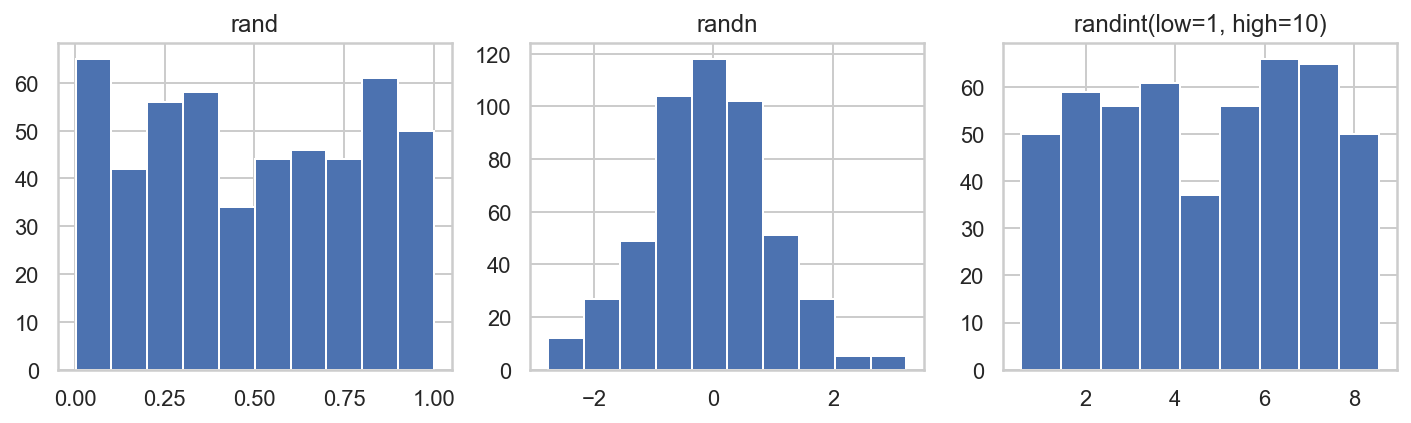

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(np.random.rand(500))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(500))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=500), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

#### muestreo sin reemplazamiento

In [8]:
#En estadística, se necesita a veces generar una lista única de enteros. Esto corresponde al muestreo (selección aleatoria) de elementos de  
#un conjunto (población) sin reemplazo (para que no obtengamos el mismo elemento dos veces). 
#Desde el módulo aleatorio NumPy, podemos usar la función de elección para generar este tipo de números aleatorios.
np.random.choice(10, 6, replace=False)

array([4, 9, 0, 7, 6, 1])

#### fijar semilla

In [9]:
#Cuando se trabaja con la generación de números aleatorios, puede ser útil usar una "semilla" del generador de números aleatorios. 
#La semilla es un número que inicializa el generador de números aleatorios a un estado específico, 
#de esta manera cada vez que se llama la funcion con la semilla específica, siempre genera la misma secuencia de números aleatorios.
np.random.seed(123456789)
np.random.rand()


0.532833024789759

#### números aleatorios extraidos de otras distribuciones

Se usa la clase " RandomState " que contiene los métodos para generar los números extraidos de la distribuciones de probabilidad

Se considera una buena práctica de programación usar una instancia " RandomState " en lugar de usar directamente las funciones en el módulo np.random, porque evita depender de una variable de estado global y mejora el aislamiento del código.

In [10]:
prng = np.random.RandomState(123456789)

In [11]:
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

In [12]:
prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [13]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [14]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

Y también se tienen distribuciones discretas como la poisson y la binomial:

In [15]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [16]:
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

# Uso de del módulo stats de SciPy

In [17]:
from scipy import stats

pdf : Probability distribution function (continuous)
    
pmf : probability mass function (dicrete)

cdf : Cumulative distribution function

sf : Survival function (1 – cdf)

ppf : Percent-point function (inverse of cdf)

moment : Noncentral moments of nth order

stats : Statistics of the distribution (typically the mean and variance, sometimes additional statistics)

fit : Fit distribution to data using a numerical maximum likelihood optimization (for continuous distributions)

expect : Expectation value of a function with respect to the distribution

interval : The endpoints of the interval that contains a given percentage of the distribution (confidence interval)

rvs : Random variable samples. Takes as argument the size of the resulting array of samples


mean, meadian, var, std : Descriptive statistics: mean, median, standard deviation, and the variance of the distribution



#### Casos de uso de la clase " random variable"

Se define una variable aleatoria distribuida normalmente con media cero y desviación estándar $\frac{1}{2}$

In [18]:
X = stats.norm(1, 0.5)

Ahora $X$ es un objeto que representa una variable aleatoria

In [19]:
print("promedio , mediana , desviacion estandar , varianza", X.mean(), X.median(), X.std(), X.var())

promedio , mediana , desviacion estandar , varianza 1.0 1.0 0.5 0.25


In [20]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [21]:
#devuelve la lista de los parametros de las que depende la distribucion
X.stats()

(array(1.), array(0.25))

In [22]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [23]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [24]:
# calaula un intervalo tal que el porcentaje dado caiga adentro del intervalo respuesta
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [25]:
# calaula un intervalo tal que el porcentaje dado caiga adentro del intervalo respuesta
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

In [26]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

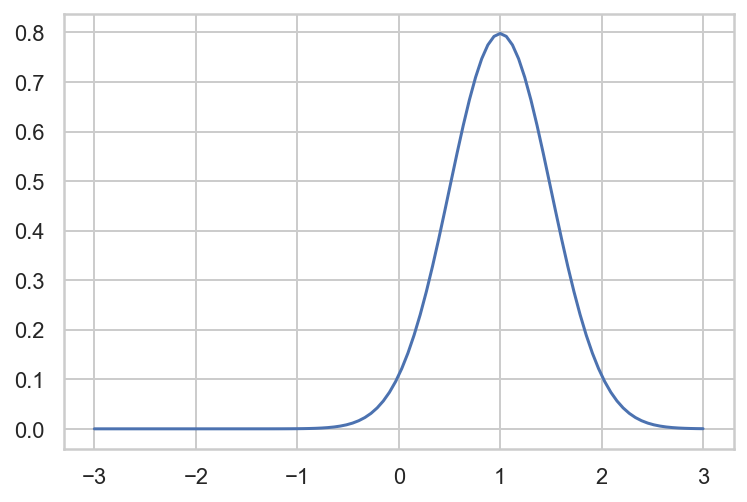

In [27]:
xdom = np.linspace(-3,3,100)
plt.plot(xdom, X.pdf(xdom))

#### números aleatorios con stats 

In [28]:
X = stats.norm(1, 0.5)
X.rvs(8)

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384])

#### Pruebas de hipótesis

se siguen los siguientes pasos:
    
1. Se formulan la hipótesis nula y la hipótesis alternativa.

2. Se selecciona un estadístico tal que su distribución muestral bajo la hipótesis nula sea conocida.

3. Se seleccionan los datos.

4. Se calcula el estadístico de los datos y se calcula su valor $p$ bajo la hipótesis nula.

5. Si el valor $p$ es menor que la significancia predeterminada $\alpha$, se rechaza la hipótesis nula. Si el valor $p$ es mayor no se rechaza la hipótesis nula $H_0$. 

Error Tipo I: rechazar la hipótesis nula cuando en realidad no debería rechazarse
    
Error Tipo II: dejar de rechazar la hipótesis nula cuando debería rechazarse

Generalmente el paso más complicado en la lista que se ilustra es encontrar la distribución muestral del estadítico de prueba.

#### Ejemplo: 

considere una hipótesis nula que afirma que una variable aleatoria $X$ tiene una media $\mu_0 = 1$. Dadas las muestras de $X$, entonces deseamos probar si los datos muestreados son compatibles con la hipótesis nula. Aquí simulamos las muestras extrayendo $100$ muestras aleatorias de una distribución ligeramente diferente a la que se afirma en la hipótesis nula (usando $\mu = 0.8$):

In [29]:
mu0, mu, sigma = 1.0, 0.8, 0.5

In [30]:
X = stats.norm(mu, sigma)

In [31]:
n=100

In [32]:
X_samples = X.rvs(n)

Dados los datos de muestra, " X_samples ", a continuación debemos calcular un estadístico de prueba. Si se conoce la desviación estándar de la 
población $\sigma$, como en este ejemplo, se puede usar

$$
z = \frac{\bar{x}-\mu}{\sigma/\sqrt{n}}
$$

el cual es distribuido normalmente.

In [33]:
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
z

-4.180944153431165

Si no se conoce la varianza de la población, se puede usar la desviación estándar de la muestra en su lugar:

$$
t = \frac{\bar{x}-\mu}{\sigma_x/\sqrt{n}}
$$

Pero en este caso el estadístico de prueba sigue una distribución $t$ de student (ya no se distribuye normalmente).

Se calcula la desvicación estándar de la muestra usando la función de numpy std con $ddof = 1$

In [34]:
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-4.472591761993936

En cualquier caso, obtenemos un estadístico de prueba que podemos comparar con la distribución correspondiente para obtener un valor p. 


Por ejemplo, para una distribución normal, podemos usar una instancia de stats.norm para representar una variable aleatoria distribuida normal, y con su método ppf, podemos buscar el valor estadístico que corresponde a un cierto nivel de significancia.

Para una prueba de hipótesis de dos lados el nivel de significancia 5% (2.5% en cada lado), el umbral estadístico es

In [35]:
stats.norm().ppf(0.025)

-1.9599639845400545

Dado que las estadísticas observadas son aproximadamente -6.50, que es más pequeño que el valor umbral –1.96 para una prueba de dos lados con un nivel de significación del 5%, tenemos motivos suficientes para rechazar la hipótesis nula en este caso.

#### Usando la funcion de stats para la prueba de hipóteis

In [36]:
t, p = stats.ttest_1samp(X_samples, mu)

In [37]:
t

-0.19356616599459797

In [38]:
p

0.846912183476679

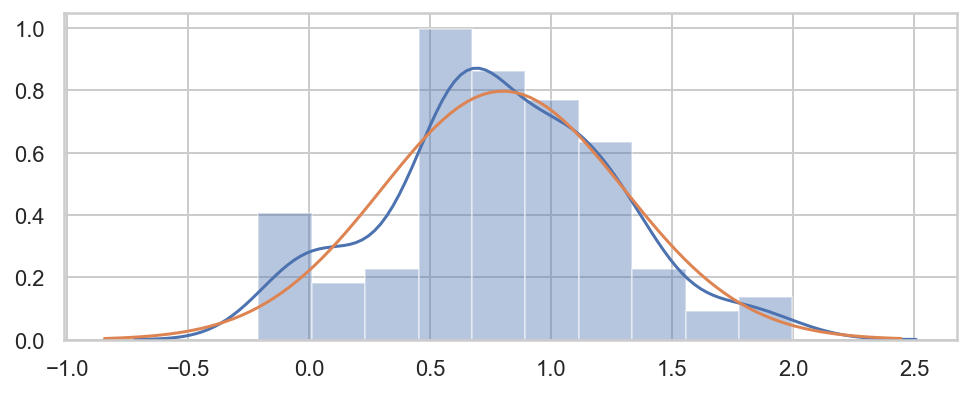

In [39]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

En la gráfica roja se ilustra la distribución de probabilidad de acuerdo a la hipótesis nula. Y la distribución de 
probabilidad estimada de la muestra se observa en la gráfica azul.

# Para conocer más de pruebas de hipótesis se necesita el próximo laboratorio de estadística 